### Jupyter Notebook to view DOQ-like images generated by Unconditional Diffusion

In [2]:
import matplotlib.pyplot as plt
import torch
from diffusers import DDPMPipeline, DDPMScheduler, UNet2DModel

In [4]:
unet = UNet2DModel.from_pretrained("/data/diffden/train_output/unet")
# use torch.compile on this

In [3]:
num_params = sum(p.numel() for p in unet.parameters())
num_params

28444929

In [4]:
noise_scheduler = DDPMScheduler(num_train_timesteps=1000, beta_schedule="linear")

In [5]:
pipeline = DDPMPipeline(
    unet=unet,
    scheduler=noise_scheduler,
).to("cuda")

device = pipeline.device

### Generated DOQ Images from 100 and 1000 inference steps

In [115]:
generator = torch.Generator(device=device).manual_seed(468)

images_100 = pipeline(generator=generator, batch_size=16, num_inference_steps=100, output_type="np").images
images_1000 = pipeline(generator=generator, batch_size=16, num_inference_steps=1000, output_type="np").images

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

<Figure size 640x480 with 0 Axes>

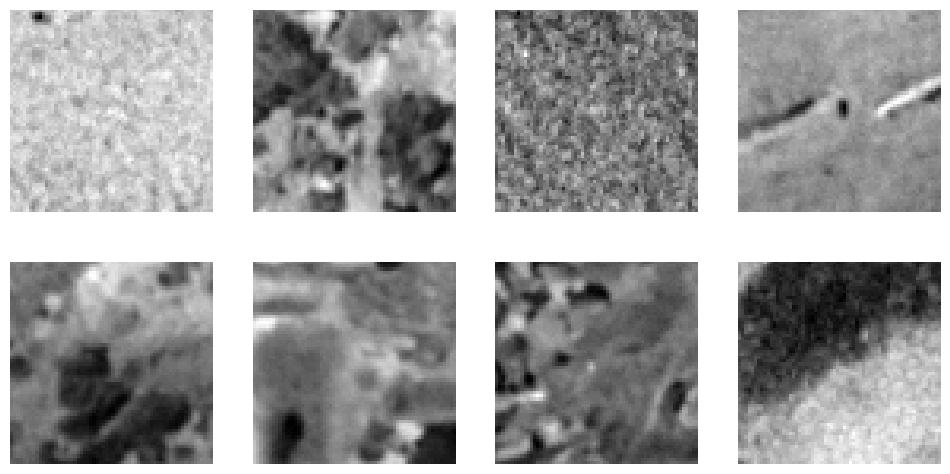

In [128]:
# show 8 images in a 2x4 grid
plt.suptitle("Images from 100 inference steps")
fig, axs = plt.subplots(2, 4, figsize=(12, 6))
for i, ax in enumerate(axs.flat):
    ax.imshow(images_100[i], cmap="gray")
    ax.axis("off")

# plt.savefig('/data/images/unconditional_gen_100steps.png', dpi=300)

<Figure size 640x480 with 0 Axes>

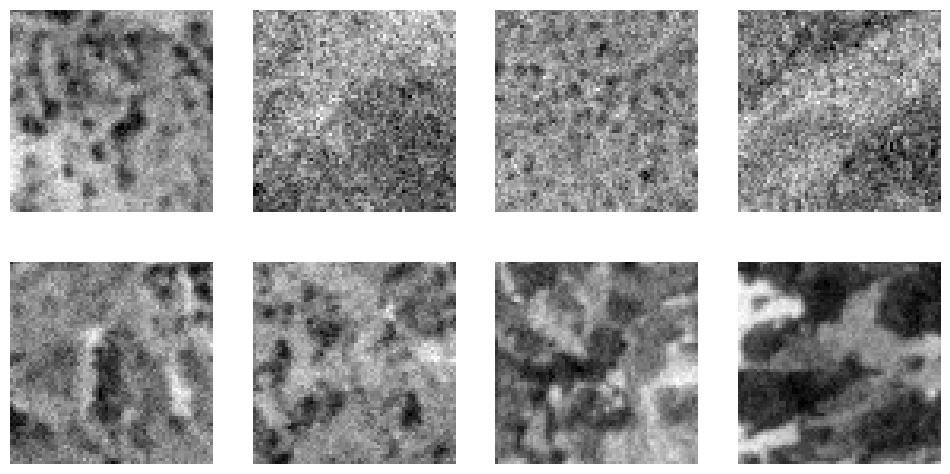

In [129]:
# show the 8 images in a 2x4 grid
plt.suptitle("Images from 1000 inference steps")
fig, axs = plt.subplots(2, 4, figsize=(12, 6))
for i, ax in enumerate(axs.flat):
    ax.imshow(images_1000[i], cmap="gray")
    ax.axis("off")

# plt.savefig('/data/images/unconditional_gen_1000steps.png', dpi=300)


Comparison between 100 and 1000 inference steps. Surprisingly, 100 and 1000 inference steps image generation produces completely different images even with the same seed. This requires further investigation. Below are images from 100 and 1000 inference steps side by side. 

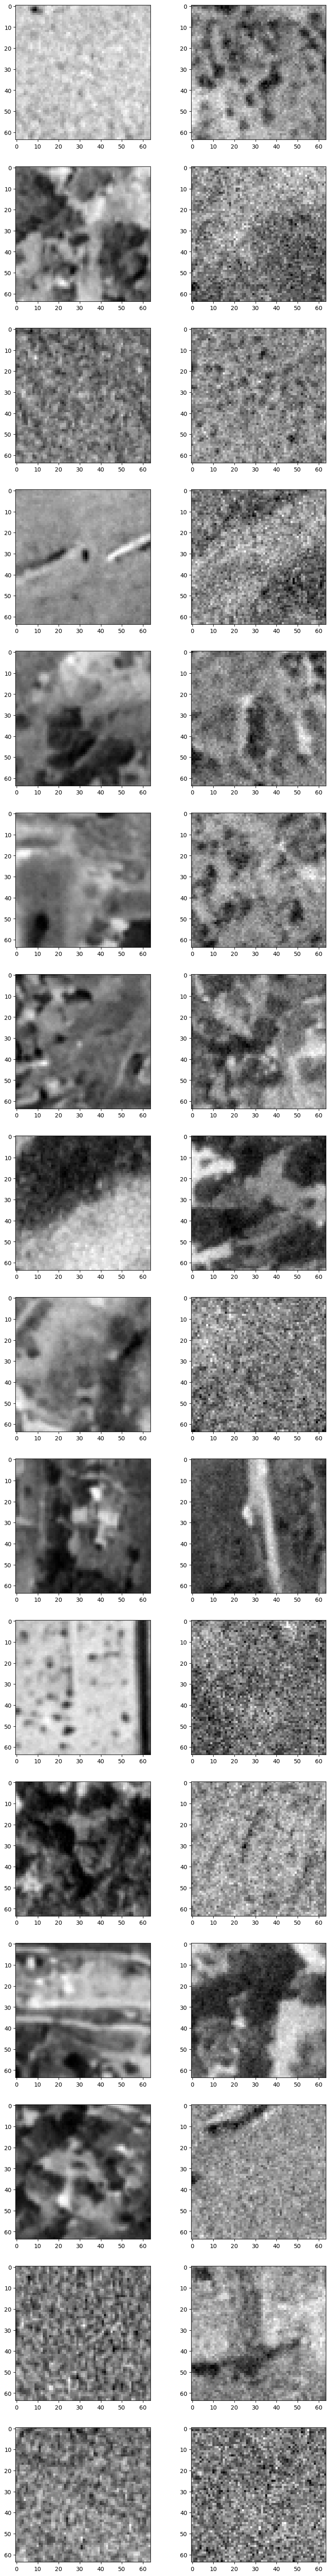

In [126]:
n = len(images_100)
fig, ax = plt.subplots(n, 2, figsize=(10, n*5))
for i in range(len(images_100)):
    ax[i][0].imshow(images_100[i], cmap='gray')
    ax[i][1].imshow(images_1000[i], cmap='gray')